# **RNN**
A recurrent neural network (RNN) is a class of artificial neural network where connections between units form a directed cycle. This creates an internal state of the network which allows it to exhibit dynamic temporal behavior.

IMDB sentiment classification task

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. IMDB provided a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided.

You can download the dataset from http://ai.stanford.edu/~amaas/data/sentiment/  or you can directly use 
" from keras.datasets import imdb " to import the dataset.

Few points to be noted:
Modules like SimpleRNN, LSTM, Activation layers, Dense layers, Dropout can be directly used from keras
For preprocessing, you can use required 

In [1]:
#load the imdb dataset 
from keras.datasets import imdb

vocabulary_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

17473536/17464789 [==============================] - 0s 0us/step
Loaded dataset with 25000 training samples, 25000 test samples


In [2]:
#the review is stored as a sequence of integers. 
# These are word IDs that have been pre-assigned to individual words, and the label is an integer

print('---review---')
print(X_train[5])
print('---label---')
print(y_train[5])

# to get the actual review
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in X_train[6]])
print('---label---')
print(y_train[6])

---review---
[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 2, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]
---label---
0
1654784/1641221 [==============================] - 0s 0us/step
---review with words---
['the', 'and', 'full', 'involving', 'to', 'impressive', 'boring', 'this', 'as', 'and', 'and', 'br', 'villain', 'and', 'and', 'need', 'has', 'of', 'costumes', 'b', 'message', 'to', 'may', 'of', 'props', 'this', 'and', 'and', 'concept', 'issue', 'and', 'to', "god's", 'he', 'is', 'and', 'unfolds', 'movie', 'women', 'like', "isn't", 'surely', "i'm", 'and', 'to', 'toward', 'in', "here's", 'for', 'from', 'did', 'having', 'because', 'very', 'quality', 'it', 'is', 'and', 'and', 'really', 'book', 'is', 'both', 'too', 'worked', 'carl', 'of', 'and', 'br', 'of', 'reviewer', 'closer', 'figure', 'really', 'there', 'will', 'and', 'things', 'is', 'far', 'this', 'make', 'mistakes', 'and', 'was', "couldn't", 

In [3]:
print('Maximum length of review : {0}'.format(
len(max((X_train + X_test), key=len))))
print('Minimum length: of review {0}'.format(
len(min((X_test + X_test), key=len))))

Maximum length of review : 2697
Minimum length: of review 14


In [4]:
#pad sequences (write your code here)
from keras.preprocessing import sequence
from keras.preprocessing import sequence
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)




In [5]:
#design a RNN model (write your code)

from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,SimpleRNN

model = Sequential()

embedding_size=32
batch_size = 32
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
#model.add(Embedding(embedding_size, embedding_size, input_length=max_words))
#model.add(Embedding(embedding_size, embedding_size, input_length=max_words))
model.add(SimpleRNN(batch_size,input_shape = (vocabulary_size,500), return_sequences=False,activation="relu"))
model.add(Dense(1, activation='sigmoid'))



print(model.summary())





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 162,113
Trainable params: 162,113
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
#train and evaluate your model
#choose your loss function and optimizer and mention the reason to choose that particular loss function and optimizer
# use accuracy as the evaluation metric



model.compile(loss = 'binary_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])


Binary CrossEntropy is probably the most popular loss metric for binary classification task.Adam is the most advanced and sophisticated optimizer.

In [7]:
import numpy as np
batch_size = 32
num_epochs = 10


X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
# Our vectorized labels
y_train2 = np.asarray(y_train2).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
y_valid = np.asarray(y_valid).astype('float32').reshape((-1,1))
training_RNN = model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Epoch 1/10
781/781 [==============================] - 303s 385ms/step - loss: 0.5091 - accuracy: 0.7343 - val_loss: 0.2950 - val_accuracy: 0.8750
Epoch 2/10
781/781 [==============================] - 302s 386ms/step - loss: 0.3261 - accuracy: 0.8622 - val_loss: 0.2559 - val_accuracy: 0.9062
Epoch 3/10
781/781 [==============================] - 300s 385ms/step - loss: 0.3165 - accuracy: 0.8647 - val_loss: 0.2452 - val_accuracy: 0.9062
Epoch 4/10
781/781 [==============================] - 301s 385ms/step - loss: 0.2491 - accuracy: 0.9003 - val_loss: 0.2545 - val_accuracy: 0.9375
Epoch 5/10
781/781 [==============================] - 299s 382ms/step - loss: 0.2170 - accuracy: 0.9134 - val_loss: 0.3052 - val_accuracy: 0.8438
Epoch 6/10
781/781 [==============================] - 299s 382ms/step - loss: 0.1927 - accuracy: 0.9251 - val_loss: 0.2887 - val_accuracy: 0.8438
Epoch 7/10
781/781 [==============================] - 297s 381ms/step - loss: 0.2071 - accuracy: 0.9200 - val_loss: 0.2928 -

In [8]:
#evaluate the model using model.evaluate()
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])


Test accuracy: 0.8461599946022034


# **LSTM**

Instead of using a RNN, now try using a LSTM model and compare both of them. Which of those performed better and why ?


In [9]:
embedding_size=32
model1 = Sequential()
model1.add(Embedding(vocabulary_size, embedding_size, input_length=max_words) )
model1.add(LSTM(100) )
model1.add(Dense(1, activation='sigmoid'))
print(model1.summary())

model1.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

batch_size = 32
num_epochs = 10


training_LSTM = model1.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

scores = model1.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
781/781 [==============================] - 21s 23ms/step - loss: 0.5479 - accuracy: 0.7177 - val_loss: 0.2869 - val_accuracy: 0.9375
Epoch 2/10
781/781 [==============================] - 18s 23ms/step - loss: 0.4012 - accuracy: 0.8123 - val_loss: 0.3823 - val_accuracy: 0.8125
Epoch 3/10
781/781 



```
# This is formatted as code
```

The LSTM  outperforms the RNN as LSTM is able to understand long term dependencies through the use of memory cells and memory gates which RNN's can't

Perform Error analysis and explain using few examples.

In [11]:
print(training_RNN.history)

{'loss': [0.5090991258621216, 0.3260863423347473, 0.3164612054824829, 0.24907290935516357, 0.21702904999256134, 0.19272729754447937, 0.2070816457271576, 0.20369549095630646, 0.18358087539672852, 0.1522240787744522], 'accuracy': [0.7343399524688721, 0.8621835708618164, 0.8647468686103821, 0.9002723693847656, 0.913449227809906, 0.9251441955566406, 0.9200176000595093, 0.9182954430580139, 0.927987813949585, 0.9423261880874634], 'val_loss': [0.29503706097602844, 0.25593799352645874, 0.2452448606491089, 0.2545337677001953, 0.30523037910461426, 0.2887086868286133, 0.2927788197994232, 0.41307729482650757, 0.22747161984443665, 0.28973227739334106], 'val_accuracy': [0.875, 0.90625, 0.90625, 0.9375, 0.84375, 0.84375, 0.875, 0.75, 0.9375, 0.875]}


In [12]:
loss_RNN = training_RNN.history['loss']
val_loss_RNN = training_RNN.history['val_loss']
acc_RNN = training_RNN.history['accuracy']
val_acc_RNN = training_RNN.history['val_accuracy']

loss_LSTM = training_LSTM.history['loss']
val_loss_LSTM = training_LSTM.history['val_loss']
acc_LSTM = training_LSTM.history['accuracy']
val_acc_LSTM = training_LSTM.history['val_accuracy']
epochs = [i+1 for i in range(10)]



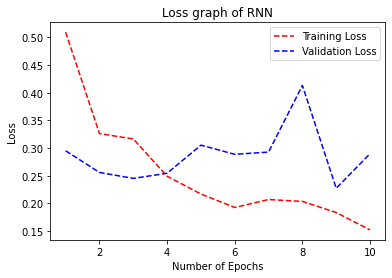

In [18]:
#Loss plot for RNN
import matplotlib.pyplot as plt
plt.plot(epochs,loss_RNN,'r--',label = "Training Loss")
plt.plot(epochs,val_loss_RNN,'b--',label = "Validation Loss")
plt.title("Loss graph of RNN")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()


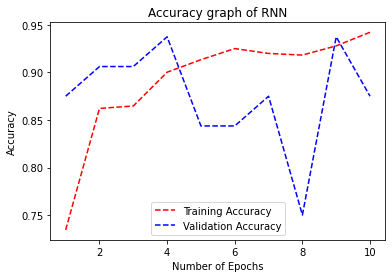

In [17]:
#Accuracy plot for RNN
import matplotlib.pyplot as plt
plt.plot(epochs,acc_RNN,'r--',label = "Training Accuracy")
plt.plot(epochs,val_acc_RNN,'b--',label = "Validation Accuracy")
plt.title("Accuracy graph of RNN")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()

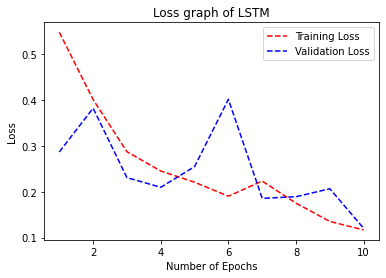

In [19]:
#Loss plot for LSTM
import matplotlib.pyplot as plt
plt.plot(epochs,loss_LSTM,'r--',label = "Training Loss")
plt.plot(epochs,val_loss_LSTM,'b--',label = "Validation Loss")
plt.title("Loss graph of LSTM")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()

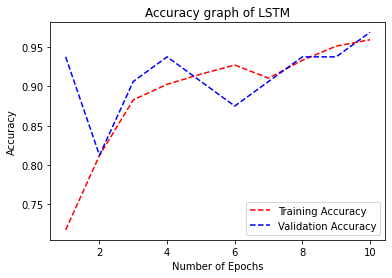

In [20]:
#Accuracy plot for LSTM
import matplotlib.pyplot as plt
plt.plot(epochs,acc_LSTM,'r--',label = "Training Accuracy")
plt.plot(epochs,val_acc_LSTM,'b--',label = "Validation Accuracy")
plt.title("Accuracy graph of LSTM")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()

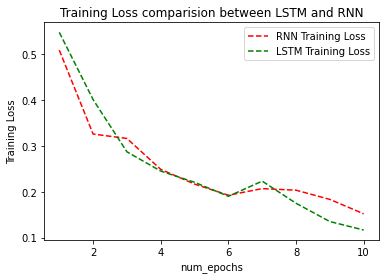

In [24]:
#COMPARISONS ON TRAINING LOSS
plt.plot(epochs,loss_RNN,'r--',label = "RNN Training Loss")
plt.plot(epochs,loss_LSTM,'g--',label = "LSTM Training Loss")
plt.title("Training Loss comparision between LSTM and RNN")
plt.xlabel("num_epochs")
plt.ylabel("Training Loss")
plt.legend()


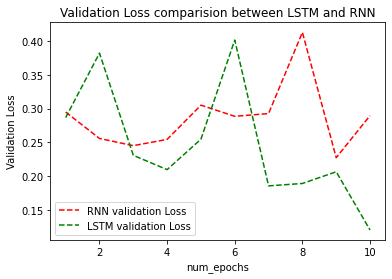

In [23]:
#COMPARISONS ON VALIDATION LOSS
plt.plot(epochs,val_loss_RNN,'r--',label = "RNN validation Loss")
plt.plot(epochs,val_loss_LSTM,'g--',label = "LSTM validation Loss")
plt.title("Validation Loss comparision between LSTM and RNN")
plt.xlabel("num_epochs")
plt.ylabel("Validation Loss")
plt.legend()

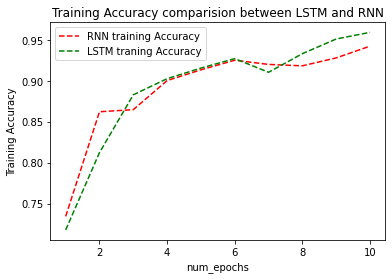

In [26]:
#COMPARISONS ON TRAINING ACC
plt.plot(epochs,acc_RNN,'r--',label = "RNN training Accuracy")
plt.plot(epochs,acc_LSTM,'g--',label = "LSTM traning Accuracy")
plt.title("Training Accuracy comparision between LSTM and RNN")
plt.xlabel("num_epochs")
plt.ylabel("Training Accuracy")
plt.legend()

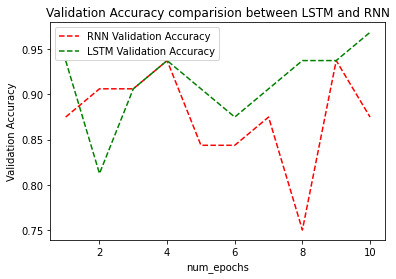

In [27]:
#COMPARISONS ON Validation Accuracy
plt.plot(epochs,val_acc_RNN,'r--',label = "RNN Validation Accuracy")
plt.plot(epochs,val_acc_LSTM,'g--',label = "LSTM Validation Accuracy")
plt.title("Validation Accuracy comparision between LSTM and RNN")
plt.xlabel("num_epochs")
plt.ylabel("Validation Accuracy")
plt.legend()